In [1]:
# standard python imports
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import copy

# pytorch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

In [2]:
data = np.load('exp_io_data\CoupledPendula_mean_in7_out7_Tmax2.0_data.npz')
for key, val in data.items():
    print(key)
    exec(key +'=val')

xlist
exp_out_list


In [3]:
x=xlist
y=exp_out_list
#print(y)

In [4]:
x_in=x[:,0:7]
x_para=x[:,7:14]
print(x_in)
print(x_para)

[[0.9515082  0.02859658 0.36347437 ... 0.29026783 0.28387797 0.8419266 ]
 [0.25135255 0.7703726  0.775273   ... 0.26973665 0.31673884 0.99253637]
 [0.19514024 0.16856277 0.07611024 ... 0.4190451  0.6547026  0.741501  ]
 ...
 [0.47233897 0.5813042  0.5970881  ... 0.7763897  0.5073947  0.7575072 ]
 [0.9792367  0.9304237  0.7407218  ... 0.09650952 0.9922384  0.6034505 ]
 [0.77542037 0.6565631  0.83288056 ... 0.16725242 0.51682055 0.0229215 ]]
[[0.5066393  0.07776338 0.32904607 ... 0.35507327 0.8292224  0.4047569 ]
 [0.630146   0.47159117 0.4004389  ... 0.14982301 0.15127295 0.7362834 ]
 [0.5401975  0.976835   0.56292295 ... 0.7874241  0.22519547 0.09913057]
 ...
 [0.0337255  0.98807234 0.86698616 ... 0.4770273  0.8321323  0.0551641 ]
 [0.5062818  0.46712315 0.6893189  ... 0.07495439 0.42210817 0.49420857]
 [0.4805187  0.12132865 0.10306191 ... 0.03630865 0.04533863 0.08364367]]


In [5]:
print(x.shape)
print(y.shape)

(2000, 14)
(2, 60, 2000, 7, 2)


In [6]:
#y1=y[0:1,29:30,:,:,0:1]
print(y.shape)

F=3 #Fth frame
y2=y[0:1,:,0:1000,:,0:1]
y2_np=torch.from_numpy(y2)
y2=torch.transpose(y2_np,1,2)
print(y2.shape)
y3=y2.squeeze(0).squeeze(3)
print(y3.shape)
y_train=y3[:,F:F+1,:]
print(y_train.shape)

(2, 60, 2000, 7, 2)
torch.Size([1, 1000, 60, 7, 1])
torch.Size([1000, 60, 7])
torch.Size([1000, 1, 7])


In [7]:
x_train=x_in[0:1000,:]
x_train2=x[0:1000,:]
print(x_train.shape)
print(x)

(1000, 7)
[[0.9515082  0.02859658 0.36347437 ... 0.35507327 0.8292224  0.4047569 ]
 [0.25135255 0.7703726  0.775273   ... 0.14982301 0.15127295 0.7362834 ]
 [0.19514024 0.16856277 0.07611024 ... 0.7874241  0.22519547 0.09913057]
 ...
 [0.47233897 0.5813042  0.5970881  ... 0.4770273  0.8321323  0.0551641 ]
 [0.9792367  0.9304237  0.7407218  ... 0.07495439 0.42210817 0.49420857]
 [0.77542037 0.6565631  0.83288056 ... 0.03630865 0.04533863 0.08364367]]


In [9]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 14 ,bias=True)
        self.layer2 = nn.Linear(14, 14,bias=True)
        self.layer3 = nn.Linear(14, 14,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,activation="RELU"):
        
        if activation=="RELU":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            p = torch.flatten(p, 1)
            
            x = x+0.1*(self.layer1(x))
            x = x+0.1*(self.layer2(x))
            x = x+0.1*(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))
        if activation=="SIG":
            x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
            x = x+torch.sigmoid(self.layer1(x))
            x = x+torch.sigmoid(self.layer2(x))
            x = x+torch.sigmoid(self.layer3(x))
            #x = x+torch.sigmoid(self.layer4(x))
            #x = x+torch.sigmoid(self.layer5(x))
            x = self.layer4(x)
            #x = F.relu(self.layer4(x))
            #x = F.relu(self.layer5(x))
            #x = torch.sigmoid(self.layer6(x))            
        return x


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=14, bias=True)
  (layer2): Linear(in_features=14, out_features=14, bias=True)
  (layer3): Linear(in_features=14, out_features=14, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [26]:



class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()

        self.layer1 = nn.Linear(14, 7 ,bias=True)
        self.layer2 = nn.Linear(14, 7,bias=True)
        self.layer3 = nn.Linear(14, 7,bias=True)
        #self.layer4 = nn.Linear(14, 14,bias=True)
        #self.layer5 = nn.Linear(14, 14,bias=True)
        self.layer4 = nn.Linear(14, 7,bias=True)
    def forward(self, x,p,activation="RELU"):
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        out=x.unsqueeze(2)
        p = torch.flatten(p, 1)
        x1 = torch.cat((x,p),1)
        x = x+0.1*(self.layer1(x1))
        out=torch.cat((out,x.unsqueeze(2)),2)
        x1 = torch.cat((x,p),1)
        x = x+0.1*(self.layer2(x1))
        out=torch.cat((out,x.unsqueeze(2)),2)
        x1 = torch.cat((x,p),1)
        x = x+0.1*(self.layer3(x1))
        out=torch.cat((out,x.unsqueeze(2)),2)
        x1 = torch.cat((x,p),1)
        x = self.layer4(x1)
        out=torch.cat((out,x.unsqueeze(2)),2)
        return out


net = Net()
print(net)

Net(
  (layer1): Linear(in_features=14, out_features=7, bias=True)
  (layer2): Linear(in_features=14, out_features=7, bias=True)
  (layer3): Linear(in_features=14, out_features=7, bias=True)
  (layer4): Linear(in_features=14, out_features=7, bias=True)
)


In [27]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([7, 14])


In [37]:
x_data=torch.tensor(x_train)
input = x_data
para=torch.tensor(x_para[0:1000,:])
print(input)
# #print(para.size())
# temp=torch.cat((input,para),1)
# #print(temp.size())
# qq=torch.flatten(input,0)
# print(qq)
# qqq=torch.flatten(input,1)
# print(qqq)

tensor([[0.9515, 0.0286, 0.3635,  ..., 0.2903, 0.2839, 0.8419],
        [0.2514, 0.7704, 0.7753,  ..., 0.2697, 0.3167, 0.9925],
        [0.1951, 0.1686, 0.0761,  ..., 0.4190, 0.6547, 0.7415],
        ...,
        [0.4544, 0.4159, 0.9657,  ..., 0.0230, 0.6355, 0.7061],
        [0.9190, 0.8373, 0.7646,  ..., 0.5021, 0.4251, 0.3727],
        [0.3159, 0.7681, 0.3129,  ..., 0.6487, 0.1180, 0.5945]])


In [15]:
x_data=torch.tensor(x_train)
input = x_data
para=torch.tensor(x_para[0:1000,:])
out = net(input,para,"SIG")
print(out)
print(out.shape)

tensor([[[ 0.9515,  0.9789,  1.0139,  1.0552,  0.0842],
         [ 0.0286,  0.0477,  0.0546,  0.0210,  0.0172],
         [ 0.3635,  0.3246,  0.3061,  0.2586,  0.3028],
         ...,
         [ 0.2903,  0.2839,  0.3095,  0.3254,  0.0664],
         [ 0.2839,  0.3495,  0.2957,  0.2752, -0.2247],
         [ 0.8419,  0.8213,  0.8641,  0.8359, -0.4967]],

        [[ 0.2514,  0.2819,  0.3085,  0.3220,  0.1944],
         [ 0.7704,  0.7652,  0.8166,  0.7781, -0.2696],
         [ 0.7753,  0.7535,  0.7551,  0.7444, -0.0036],
         ...,
         [ 0.2697,  0.2557,  0.2754,  0.2240, -0.0323],
         [ 0.3167,  0.3780,  0.3409,  0.3133, -0.4194],
         [ 0.9925,  1.0096,  1.0235,  1.0059, -0.4868]],

        [[ 0.1951,  0.2672,  0.2889,  0.3555, -0.1787],
         [ 0.1686,  0.1481,  0.1413,  0.1115,  0.3079],
         [ 0.0761,  0.0682,  0.0316,  0.0569, -0.1188],
         ...,
         [ 0.4190,  0.4087,  0.4356,  0.4084, -0.0513],
         [ 0.6547,  0.7392,  0.7065,  0.6948, -0.6005],
  

In [39]:
print(y3.size())
y4=torch.transpose(y3,1,2)
y_train=y4[:,:,0:5]
print(y_train.size())

torch.Size([1000, 60, 7])
torch.Size([1000, 7, 5])


In [40]:
target=y_train
target_new=target.view(1000,7,5)
print(target_new.shape)
criterion=nn.MSELoss()
loss=criterion(out,target_new)
print(loss)

torch.Size([1000, 7, 5])
tensor(0.6447, grad_fn=<MseLossBackward>)


In [41]:
net.zero_grad()
out.backward(torch.randn(1000,7,5),retain_graph=True)

RuntimeError: Trying to backward through the graph a second time (or directly access saved variables after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved variables after calling backward.

In [48]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.01, betas=(0.9, 0.999), eps=1e-09, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net(input,para)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)


tensor(0.6490, grad_fn=<MseLossBackward>)
tensor(0.6403, grad_fn=<MseLossBackward>)
tensor(0.6332, grad_fn=<MseLossBackward>)
tensor(0.6271, grad_fn=<MseLossBackward>)
tensor(0.6220, grad_fn=<MseLossBackward>)
tensor(0.6175, grad_fn=<MseLossBackward>)
tensor(0.6135, grad_fn=<MseLossBackward>)
tensor(0.6100, grad_fn=<MseLossBackward>)
tensor(0.6068, grad_fn=<MseLossBackward>)
tensor(0.6039, grad_fn=<MseLossBackward>)
tensor(0.6013, grad_fn=<MseLossBackward>)
tensor(0.5989, grad_fn=<MseLossBackward>)
tensor(0.5967, grad_fn=<MseLossBackward>)
tensor(0.5948, grad_fn=<MseLossBackward>)
tensor(0.5929, grad_fn=<MseLossBackward>)
tensor(0.5911, grad_fn=<MseLossBackward>)
tensor(0.5894, grad_fn=<MseLossBackward>)
tensor(0.5878, grad_fn=<MseLossBackward>)
tensor(0.5863, grad_fn=<MseLossBackward>)
tensor(0.5848, grad_fn=<MseLossBackward>)
tensor(0.5834, grad_fn=<MseLossBackward>)
tensor(0.5821, grad_fn=<MseLossBackward>)
tensor(0.5808, grad_fn=<MseLossBackward>)
tensor(0.5796, grad_fn=<MseLossBac

In [19]:
x_test=x[1000:2000,:]
print(x_test.shape)
y1=y[0:1,:,1000:2000,:,0:1]
#(Nrepeat, Ntimesteps, Nx, output_dim, 2)  <-- 2 = (final position, final velocity)
y1_np=torch.from_numpy(y1)
y1=torch.transpose(y1_np,1,2)

(1000, 14)


In [23]:
y44=y1.squeeze(0).squeeze(3)
print(y4.shape)

y_test=y44[:,F:F+1,:]                
print(y_test.shape)



torch.Size([1000, 7, 60])
torch.Size([1000, 1, 7])


In [25]:
x_test=torch.tensor(x_test)
para_test=torch.tensor(x_para[1000:2000,:])
test_out=net(x_test,para_test)
#LOSS = criterion(test_out, y_test)
print(test_out)
print(y_test)



<ipython-input-25-ad9ade5be45a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_test=torch.tensor(x_test)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1000x21 and 14x7)

In [21]:
test_loss=criterion(y_test,test_out)
print(test_loss)

NameError: name 'test_out' is not defined

Text(0, 0.5, 'y_pred')

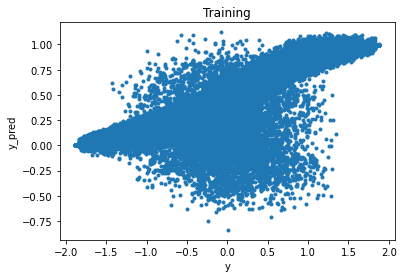

In [33]:
plt.plot(y_train.flatten(), out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

In [29]:
plt.plot(y_test.flatten(), 5*test_out.detach().numpy().flatten(), '.')
plt.title('Training')
plt.xlabel('y')
plt.ylabel('y_pred')

NameError: name 'y_test' is not defined

In [ ]:
def plot_dt_exp_comparison(yexp, ypred):

    fig, axs = plt.subplots(nrows = 3, ncols = 3, figsize = [10,8], dpi = 100, sharex=True, sharey=True)
    for i in range(9):
        plt.sca(axs.flatten()[i])
        plt.plot(ypred[i], '.-', lw = 1, c = 'k', alpha = 0.5, label = 'digital twin prediction')
        plt.plot(yexp[i], '.-', lw = 1, c = 'b', alpha = 0.5, label = 'experimental outcome')
        plt.xlabel('# pendulum')
        plt.ylabel('output angle')
        plt.title(f'Initial conditions {i}')
        plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.savefig('img/coupled_pendula_dt_examples.png')
    plt.show()
    
plot_dt_exp_comparison(y_test_new,5*test_out.detach())

In [ ]:

class Net2(nn.Module):

    def __init__(self):
        super(Net2, self).__init__()

        self.layer1 = nn.Linear(14, 120)
        self.layer2 = nn.Linear(120, 120)
        self.layer3 = nn.Linear(120, 120)
        self.layer4 = nn.Linear(120, 84)
        self.layer5 = nn.Linear(84, 42)
        self.layer6 = nn.Linear(42, 7)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.layer1(x))
        x = x+F.relu(self.layer2(x))
        x = x+F.relu(self.layer3(x))
        x = F.relu(self.layer4(x))
        x = F.tanh(self.layer5(x))
        x = F.relu(self.layer6(x))
        return x


net2 = Net2()
print(net2)

params2 = list(net2.parameters())
print(len(params2))
print(params2[0].size())

In [ ]:
x_data=torch.tensor(x)
input = x_data
out = net2(input)
print(out)
print(out.shape)

In [ ]:
target=y1[0:1000,:,:]
target_new=target.view(1000,7)

In [ ]:
import torch.optim as optim
optimizer = torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-06, weight_decay=0.1, amsgrad=False)  #adam optimizer
    
for i in range(200):
    optimizer.zero_grad()   # zero the gradient buffers
    output = net2(input)
    loss = criterion(output, target_new)
    loss.backward()
    optimizer.step()
    print(loss)
